<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Tarea Semanal Nº10
#### Gisela Farace

## Consigna

#### TS10:Filtrado digital lineal de ECG <br>
 
En el archivo ECG_TP4.mat encontrará un registro electrocardiográfico (ECG) registrado durante una prueba de esfuerzo, junto con una serie de variables descriptas a continuación. Diseñe y aplique los filtros digitales necesarios para mitigar las siguientes fuentes de contaminación:

* Ruido causado por el movimiento de los electrodos (Alta frecuencia)
* Ruido muscular (Alta frecuencia)
* Movimiento de la línea de base del ECG, inducido en parte por la respiración (Baja frecuencia)

Archivo ECG_TP4.mat (variables)

* ecg_lead: Registro de ECG muestreado a $fs=1$ KHz durante una prueba de esfuerzo
* qrs_pattern1: Complejo de ondas QRS normal
* heartbeat_pattern1: Latido normal
* heartbeat_pattern2: Latido de origen ventricular
* qrs_detections: vector con las localizaciones (en # de muestras) donde ocurren los latidos

Establezca una plantilla de diseño para los filtros digitales que necesitará para que la señal de ECG se asemeje a los latidos promedio en cuanto a suavidad de los trazos y nivel isoeléctrico nulo.

## Código

#### Importación de librerias

In [17]:
# Importación de módulos para Jupyter

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.signal.windows as wind
import scipy.io as sio

# Para la tabla
from pandas import DataFrame
from IPython.display import HTML

#Presentación de los gŕaficos
mpl.rcParams['figure.figsize'] = (17,5)
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

import warnings
warnings.filterwarnings('ignore')

## ECG: agrupación por tipo de latido

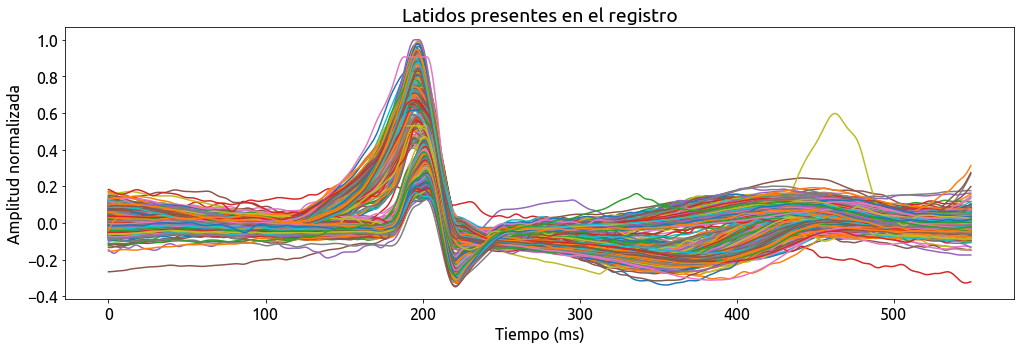

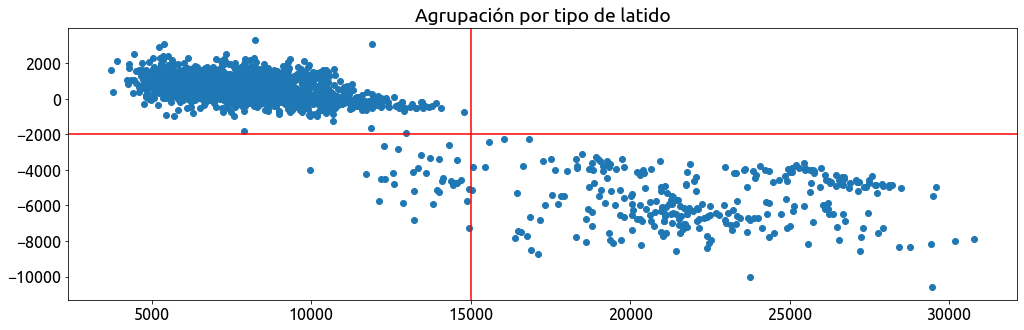

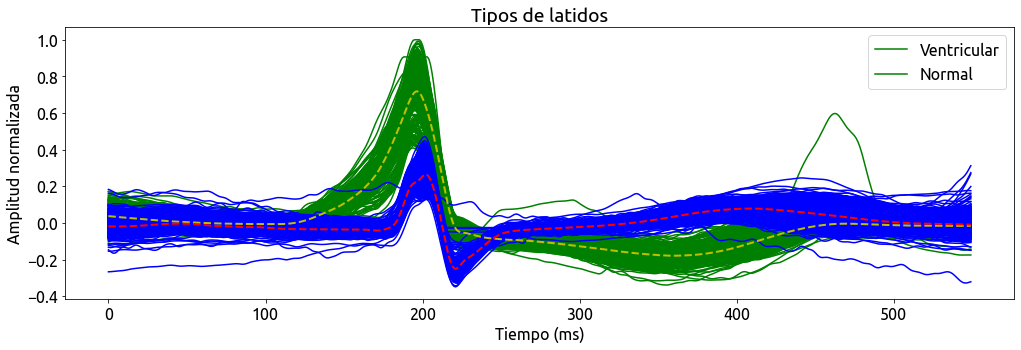

In [2]:
# ecg_lead: Registro de ECG muestreado a $fs=1$ KHz durante una prueba de esfuerzo
# qrs_pattern1: Complejo de ondas QRS normal
# heartbeat_pattern1: Latido normal
# heartbeat_pattern2: Latido de origen ventricular
# qrs_detections: vector con las localizaciones (en # de muestras) donde ocurren los latidos

mat_struct = sio.loadmat('/media/sf_UTN/PDS/PDS/Trabajos_Semanales/pds_ts9/ECG_TP4.mat')

fs = 1000

ecg = mat_struct['ecg_lead']
qrs = mat_struct['qrs_detections']
patron_normal = mat_struct['heartbeat_pattern1']
patron_ventricular = mat_struct['heartbeat_pattern2']

x = 200 #antes del pico
y = 350 #despues del pico

ecg_matr = [ (ecg[int(ii-x):int(ii+y)]) for ii in qrs]
tiempo = np.arange(0,x+y,1)

array_latidos = np.hstack(ecg_matr)
# Alineacion de latidos
array_latidos = array_latidos - np.mean(array_latidos, axis=0)
array_latidos_n = array_latidos/np.amax(array_latidos)

plt.figure(1)
plt.plot(tiempo, array_latidos_n)
plt.title('Latidos presentes en el registro')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud normalizada')

# Busco los valores en las muestras 200 (maximos) y 350 (minimos)
# Quiero agrupar y separar en dos grupos
maximos = array_latidos[200,:]
minimos = array_latidos[350,:]

cota_x = 15000
cota_y = -2000

plt.figure(2)
plt.scatter(maximos,minimos)
plt.axvline(x=cota_x, color='r')
plt.axhline(y=cota_y, color='r')
plt.title('Agrupación por tipo de latido')

nn = np.bitwise_and(maximos < cota_x, minimos > cota_y)
vv = ~nn

lat_vent = array_latidos[:,vv]
lat_norm = array_latidos[:,nn]
norm_prom = np.mean(lat_norm , axis=1)
vent_prom = np.mean(lat_vent , axis=1)

plt.figure(3)
vent = plt.plot(lat_vent/np.amax(array_latidos), 'g')
norm = plt.plot(lat_norm/np.amax(array_latidos), 'b')
vent_p = plt.plot(vent_prom/np.amax(array_latidos), '--y',lw=2)
norm_p = plt.plot(norm_prom/np.amax(array_latidos), '--r',lw=2)
plt.title('Tipos de latidos')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud normalizada')
plt.legend(['Ventricular','Normal'])

### Tomando un rango de latidos de alguna parte del ECG

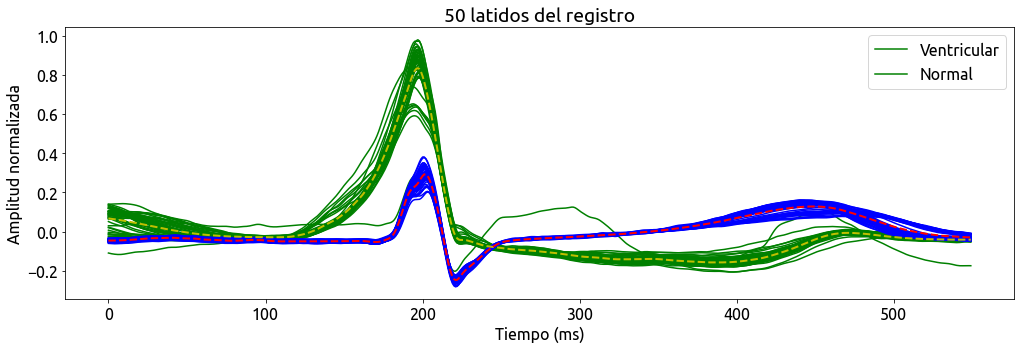

In [5]:
# Me quedo con un rango de latidos
inicio = 0
fin = 50

lat_vent_c = lat_vent[:,inicio:fin]
lat_norm_c = lat_norm[:,inicio:fin]

lv_prom = np.mean(lat_vent_c, axis=1)
ln_prom = np.mean(lat_norm_c, axis=1)

plt.figure(1)
plt.plot(lat_vent_c/np.amax(array_latidos), 'g')
plt.plot(lat_norm_c/np.amax(array_latidos), 'b')
plt.plot(lv_prom/np.amax(array_latidos), '--y',lw=2)
plt.plot(ln_prom/np.amax(array_latidos), '--r',lw=2)
plt.title('{:1.0f} latidos del registro'.format(fin-inicio))
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud normalizada')
plt.legend(['Ventricular','Normal'])

### Aplico padding para ese rango

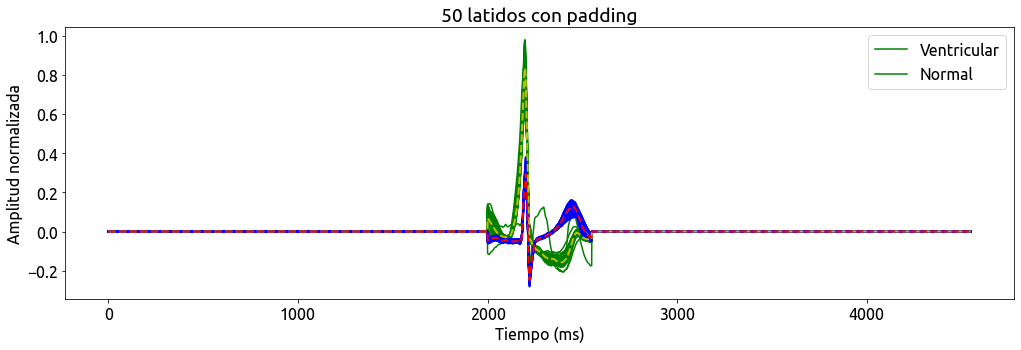

In [6]:
vent_pad = np.pad(lat_vent_c, pad_width=((2000,2000),(0,0)), mode='constant')
norm_pad = np.pad(lat_norm_c, pad_width=((2000,2000),(0,0)), mode='constant')

vent_pad_prom = np.mean(vent_pad,axis=1)
norm_pad_prom = np.mean(norm_pad,axis=1)

plt.figure(1)
plt.plot(vent_pad/np.amax(array_latidos), 'g')
plt.plot(norm_pad/np.amax(array_latidos), 'b')
plt.plot(vent_pad_prom/np.amax(array_latidos), '--y',lw=2)
plt.plot(norm_pad_prom/np.amax(array_latidos), '--r',lw=2)
plt.title('{:1.0f} latidos con padding'.format(fin-inicio))
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud normalizada')
plt.legend(['Ventricular','Normal'])

### Aplico método de Welch para obtener los espectros

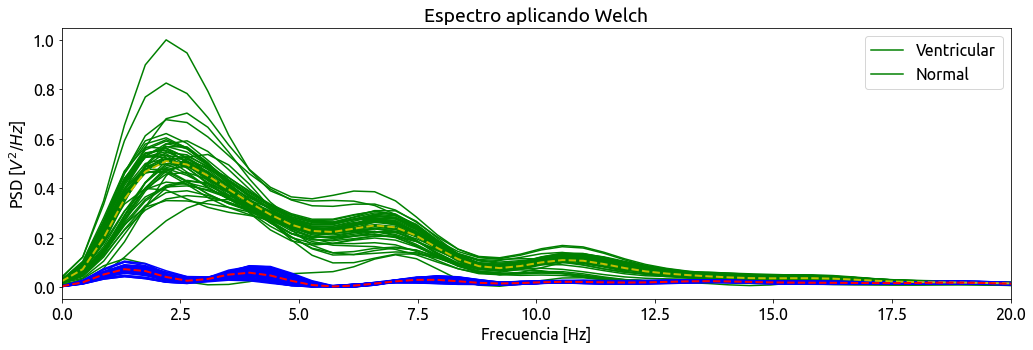

In [7]:
# Calculo la densidad espectral de potencia para cada realizacion 
# y promedio los espectros
# Aplico Welch

N = len(vent_pad)
fw_v, Pw_v = sig.welch(vent_pad, fs, nperseg = N/2, axis=0)
fw_n, Pw_n = sig.welch(norm_pad, fs, nperseg = N/2, axis=0)

norm = np.amax(Pw_v)

Pw_v_prom = np.mean(Pw_v,axis=1)
Pw_n_prom = np.mean(Pw_n,axis=1)

plt.figure(1)
plt.plot(fw_v,Pw_v/norm, 'g')
plt.plot(fw_n,Pw_n/norm, 'b')
plt.plot(fw_v,Pw_v_prom/norm, '--y',lw=2)
plt.plot(fw_n,Pw_n_prom/norm, '--r',lw=2)
plt.title('Espectro aplicando Welch')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [$V^{2}/Hz$]')
plt.xlim(0,20)
plt.legend(['Ventricular','Normal'])

Text(-20, 20, 'BW_v = 25.1 Hz')

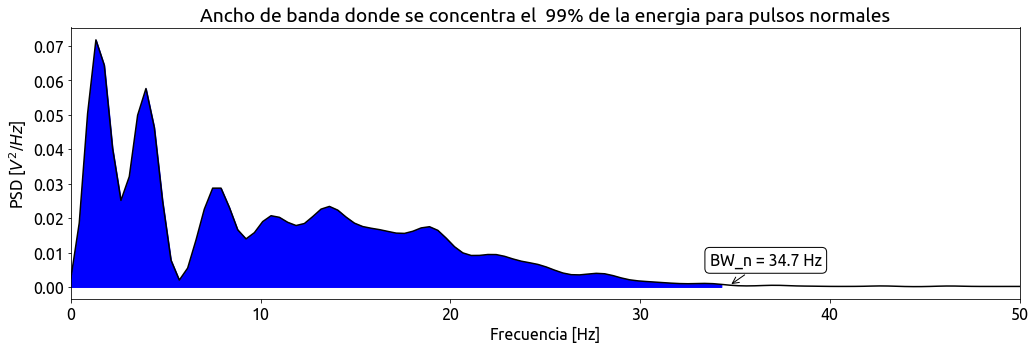

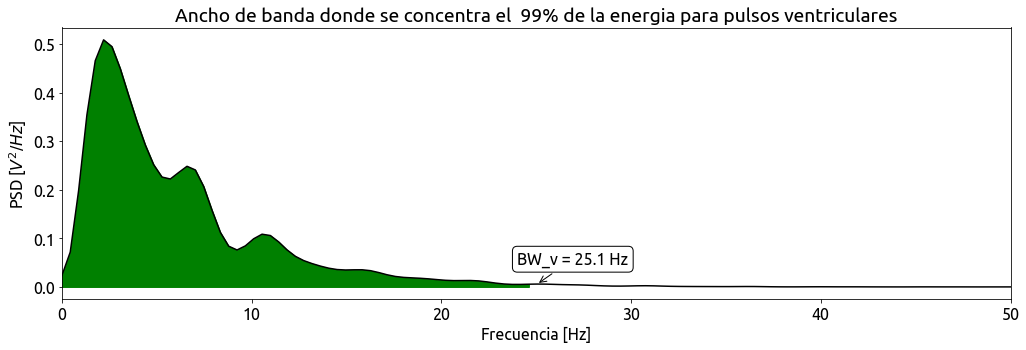

In [8]:
# Uso el promedio de los espectros
# Calculo la potencia
corte_energia = 0.99 #La señal esta muy limpia, no tiene mucho ruido 

Pot_n = np.cumsum(Pw_n_prom)/np.sum(Pw_n_prom)
corte_n = np.where(Pot_n >corte_energia)[0][0]

Pot_v = np.cumsum(Pw_v_prom)/np.sum(Pw_v_prom)
corte_v = np.where(Pot_v >corte_energia)[0][0]

plt.figure(1)
plt.plot(fw_n,Pw_n_prom/norm, 'k')
plt.fill_between(fw_n, 0, Pw_n_prom/norm, where = fw_v < fw_v[corte_n], color='blue')
plt.title('Ancho de banda donde se concentra el {:3.0f}% de la energia para pulsos normales'.format(corte_energia*100))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [$V^{2}/Hz$]')
plt.xlim(0,50)

plt.annotate(   "BW_n = {:3.1f} Hz".format(fw_n[corte_n]),
                xy=(fw_n[corte_n], Pw_n_prom[corte_n]/norm),
                xytext=(-20,20),
                textcoords="offset points",
                bbox=dict(boxstyle="round", fc="w"),
                arrowprops=dict(arrowstyle='->')
)

plt.figure(2)
plt.plot(fw_v,Pw_v_prom/norm, 'k')
plt.fill_between(fw_n, 0, Pw_v_prom/norm, where = fw_v < fw_v[corte_v], color='green')
plt.title('Ancho de banda donde se concentra el {:3.0f}% de la energia para pulsos ventriculares'.format(corte_energia*100))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [$V^{2}/Hz$]')
plt.xlim(0,50)

plt.annotate(   "BW_v = {:3.1f} Hz".format(fw_v[corte_v]),
                xy=(fw_v[corte_v], Pw_v_prom[corte_v]/norm),
                xytext=(-20,20),
                textcoords="offset points",
                bbox=dict(boxstyle="round", fc="w"),
                arrowprops=dict(arrowstyle='->')
)

### Conclusión

Dado el registro de ECG donde se encuentran ya identificados los picos, una de las estrategias para identificar los tipos de latidos es evalular la amplitud de los mismos. Se puede observar que los latidos ventriculares tienen una amplitud mayor que los latidos normales. De esta forma, haciendo un scatter se pueden agrupar los tipos de latidos.

El método de Welch divide la señal temporal en segmentos que pueden solaparse en un 50% y halla el periodograma enventanado a cada segmento y se promedian las PSD estimadas. De esta forma se pueden calcular los periodogramas de ambos tipos de latidos, y evaluar en ambos casos el punto donde se acumule el 99% de la energía para poder estimar un ancho de banda y diseñar el filtro a partir de eso. Como la señal tiene poco ruido se puede usar un porcentaje tan alto, sino debería bajarse.

# Filtrado

In [9]:
# Plantilla del filtro
    
nq = fs/2 #nyquist
    
fs0 = 0.1/nq
fc0 = 1/nq
fc1 = 35/nq
fs1 = 45/nq

alfa_min = 30
alfa_max = 0.5

wp = [fc0,fc1]
ws = [fs0,fs1]

plt.close('all')
################## FILTROS IIR ####################
#------------ BUTTER ------------ 
sos_butter = sig.iirdesign(wp=wp, ws=ws, gpass=alfa_max, gstop=alfa_min, analog=False, ftype='butter', output='sos') 
w_butter,h_butter = sig.sosfreqz(sos_butter,worN=2000, fs=fs)

#------------ CHEBYSHEV ------------
sos_cheby = sig.iirdesign(wp=wp, ws=ws, gpass=alfa_max, gstop=alfa_min, analog=False, ftype='cheby1', output='sos') 
w_cheby,h_cheby = sig.sosfreqz(sos_cheby,worN=2000, fs=fs)

################## FILTROS FIR ####################
fs0 = 0.1
fc0 = 1
fc1 = 35
fs1 = 40

#------------ REMEZ ------------
# Pasa bajos
bands = np.array([0.0, fc1, fs1, nq])
desired = [1,0]
coef = 1501
remez_lp = sig.remez(coef, bands=bands, desired=desired, fs=fs)

# Pasa alto
bands = np.array([0.0, fs0, fc0, nq])
desired = [0,1]
coef = 1501
remez_hp = sig.remez(coef, bands=bands, desired=desired, fs=fs)

# Pasa banda
remez_bp = np.polymul(remez_lp, remez_hp)
w_remez,h_remez=sig.freqz(b=remez_bp, a=1, worN=2000, whole=False, plot=None, fs=fs, include_nyquist=False)

#------------ FIRWIN ------------
numtaps=2000
b_firwin=sig.firwin(numtaps=numtaps+1, cutoff=[fc0, fc1], pass_zero=False,fs=fs)
w_firwin,h_firwin=sig.freqz(b=b_firwin, a=1, worN=2000, whole=False, plot=None, fs=fs, include_nyquist=False)

(-25.0, 5.0)

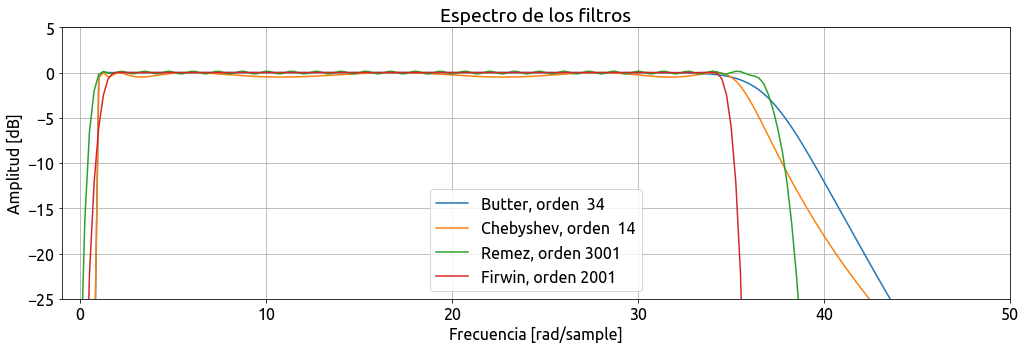

In [25]:
#%%
plt.figure(0)
plt.plot(w_butter,20*np.log10(np.abs(h_butter)), label='Butter, orden {:3.0f}'.format(sos_butter.shape[0]*2))
plt.plot(w_cheby,20*np.log10(np.abs(h_cheby)), label='Chebyshev, orden {:3.0f}'.format(sos_cheby.shape[0]*2))
plt.plot(w_remez,20*np.log10(np.abs(h_remez)), label='Remez, orden {:3.0f}'.format(remez_bp.shape[0]))
plt.plot(w_firwin,20*np.log10(np.abs(h_firwin)), label='Firwin, orden {:3.0f}'.format(b_firwin.shape[0]))

plt.title('Espectro de los filtros')
plt.xlabel('Frecuencia [rad/sample]')
plt.ylabel('Amplitud [dB]')
plt.grid(True)
plt.axis('tight')
plt.legend()
plt.xlim(-1,50)
plt.ylim(-25,5)

In [13]:
#%%
# Zonas que me interesa evaluar
zonas_con_interf_baja_frec = ( 
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )

zonas_sin_interf = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        )

zona_int_1 = ecg[int(zonas_con_interf_baja_frec[0][0]):int(zonas_con_interf_baja_frec[0][1])]
zona_int_2 = ecg[int(zonas_con_interf_baja_frec[1][0]):int(zonas_con_interf_baja_frec[1][1])]

zona_sin_int_1 = ecg[int(zonas_sin_interf[0][0]):int(zonas_sin_interf[0][1])]

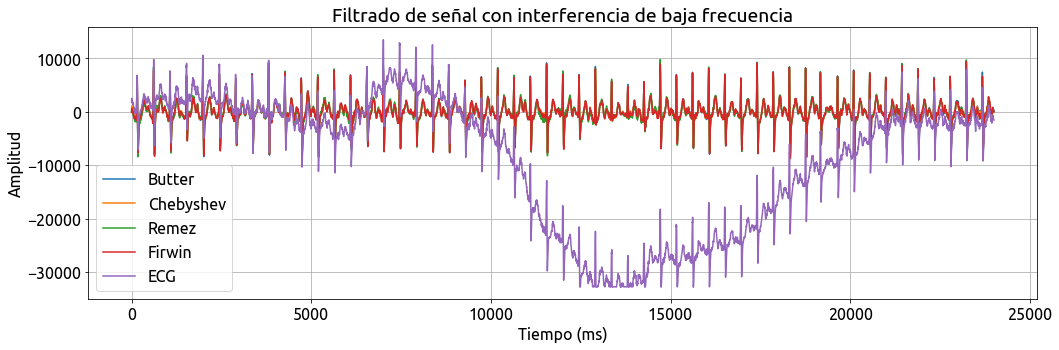

In [27]:
#filtro la señal contra el ecg completo
butter = sig.sosfiltfilt(sos_butter,zona_int_1,axis=0,padtype='odd',padlen=None)
cheby = sig.sosfiltfilt(sos_cheby,zona_int_1,axis=0,padtype='odd',padlen=None)
remez = sig.filtfilt(b=remez_bp, a=1, x=zona_int_1, axis=0, padtype='odd')
firwin = sig.filtfilt(b=b_firwin, a=1, x=zona_int_1, axis=0, padtype='odd')

plt.figure(1)
plt.plot(butter, label='Butter')
plt.plot(cheby, label='Chebyshev')
plt.plot(remez, label='Remez')
plt.plot(firwin, label='Firwin')
plt.plot(zona_int_1, label='ECG')
plt.xlabel('time (seconds)')
plt.grid(True)
plt.axis('tight')
plt.title('Filtrado de señal con interferencia de baja frecuencia')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud')
plt.legend()


Text(0, 0.5, 'Amplitud')

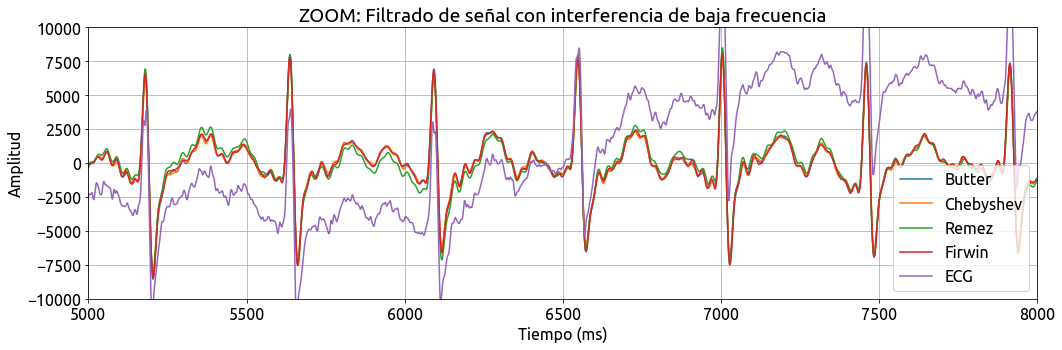

In [30]:
# Hago un zoom en una parte de la señal

plt.figure(1)
plt.plot(butter, label='Butter')
plt.plot(cheby, label='Chebyshev')
plt.plot(remez, label='Remez')
plt.plot(firwin, label='Firwin')
plt.plot(zona_int_1, label='ECG')
plt.xlabel('time (seconds)')
plt.grid(True)
plt.axis('tight')
plt.legend()
plt.xlim(5000,8000)
plt.ylim(-10000,10000)
plt.title('ZOOM: Filtrado de señal con interferencia de baja frecuencia')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud')

Text(0, 0.5, 'Amplitud')

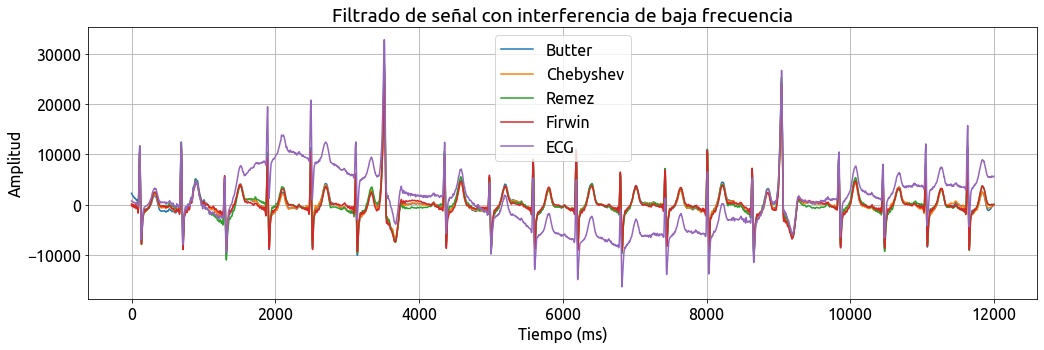

In [31]:
#filtro la señal contra el ecg completo
butter = sig.sosfiltfilt(sos_butter,zona_int_2,axis=0,padtype='odd',padlen=None)
cheby = sig.sosfiltfilt(sos_cheby,zona_int_2,axis=0,padtype='odd',padlen=None)
remez = sig.filtfilt(b=remez_bp, a=1, x=zona_int_2, axis=0, padtype='odd')
firwin = sig.filtfilt(b=b_firwin, a=1, x=zona_int_2, axis=0, padtype='odd')

plt.figure(1)
plt.plot(butter, label='Butter')
plt.plot(cheby, label='Chebyshev')
plt.plot(remez, label='Remez')
plt.plot(firwin, label='Firwin')
plt.plot(zona_int_2, label='ECG')
plt.xlabel('time (seconds)')
plt.grid(True)
plt.axis('tight')
plt.legend()
plt.title('Filtrado de señal con interferencia de baja frecuencia')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud')

Text(0, 0.5, 'Amplitud')

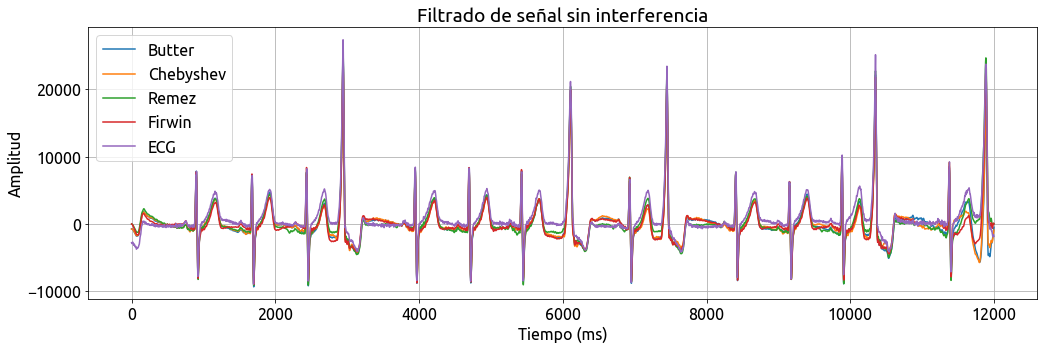

In [32]:
#filtro la señal contra el ecg completo
butter = sig.sosfiltfilt(sos_butter,zona_sin_int_1,axis=0,padtype='odd',padlen=None)
cheby = sig.sosfiltfilt(sos_cheby,zona_sin_int_1,axis=0,padtype='odd',padlen=None)
remez = sig.filtfilt(b=remez_bp, a=1, x=zona_sin_int_1, axis=0, padtype='odd')
firwin = sig.filtfilt(b=b_firwin, a=1, x=zona_sin_int_1, axis=0, padtype='odd')

plt.figure(1)
plt.plot(butter, label='Butter')
plt.plot(cheby, label='Chebyshev')
plt.plot(remez, label='Remez')
plt.plot(firwin, label='Firwin')
plt.plot(zona_sin_int_1, label='ECG')
plt.xlabel('time (seconds)')
plt.grid(True)
plt.axis('tight')
plt.legend()
plt.title('Filtrado de señal sin interferencia')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud')

Text(0, 0.5, 'Amplitud')

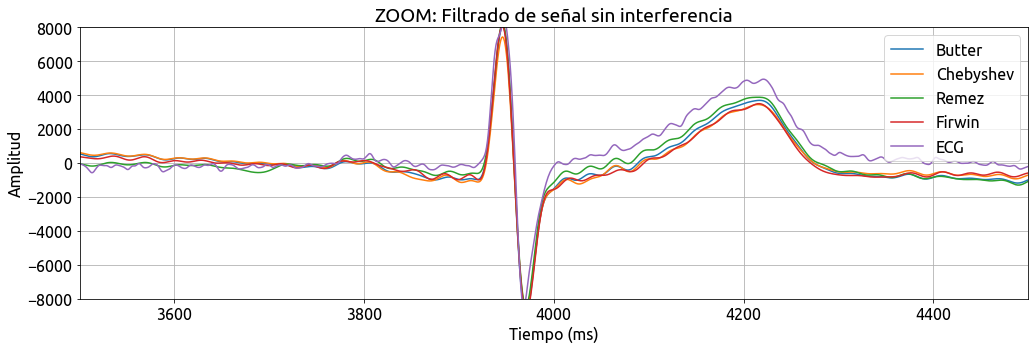

In [33]:
plt.figure(1)
plt.plot(butter, label='Butter')
plt.plot(cheby, label='Chebyshev')
plt.plot(remez, label='Remez')
plt.plot(firwin, label='Firwin')
plt.plot(zona_sin_int_1, label='ECG')
plt.xlabel('time (seconds)')
plt.grid(True)
plt.axis('tight')
plt.legend()
plt.xlim(3500,4500)
plt.ylim(-8000,8000)
plt.title('ZOOM: Filtrado de señal sin interferencia')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud')

## Conclusión

Se puede observar como los 4 filtros diseñados respetan la plantilla propuesta, y se muestran los órdenes de cada filtro.

En cuanto al proceso de filtrado, para las señales con interferencia se puede observar que en ambos casos se removió la interferencia de baja frecuencia exitosamente. 

En el caso de zonas sin interferencia se puede decir que los filtros son inocuos. Sin embargo, se puede observar un pequeño rizado luego del complejo qrs, siendo señales impulsivas en esas zonas, por lo que los filtros muestran una mala respuesta temporal.